# Dataset visualization

In [8]:
from src.yaae.engine import Node
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import imageio

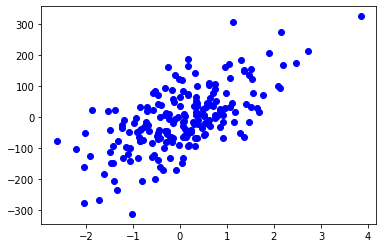

In [2]:
x, y = make_regression(n_samples=200, n_features=3, noise=10, random_state=42)
plt.scatter(x[:, 0], y, color='blue')     

# Model initialization

In [3]:
X = Node(x, requires_grad=False)
y_true = Node(y, requires_grad=False)
W = Node(np.random.randn(3), requires_grad=True)
b = Node(np.random.randn(1), requires_grad=True)

# Model training

In [4]:
EPOCH = 100
lr = 0.01

for epoch in range(EPOCH+1):
    W.zero_grad()
    b.zero_grad()
    y_pred = X.matmul(W) + b
    
    errors = y_pred - y_true
    loss = (errors * errors).sum(keepdims=False) / EPOCH
    loss.backward()
    W -= lr * W.grad.data 
    b -= lr * b.grad.data
    
    if epoch % 20 == 0:
        print(f"Epoch {epoch}: train-loss: {loss.data}")
    
    # Gif
    single_pred_gif = X.data[:, 0] * W.data[0] + b.data
    plt.scatter(x[:, 0], y, color='blue')
    plt.plot(x[:, 0], single_pred_gif, color='red')
    plt.savefig("regression/{}".format(epoch))
    plt.clf()

# Compute R2 score.
y_bar = np.average(y_true.data)
SStot = np.sum((y_true.data - y_bar)**2)
SSres = np.sum((y_true.data - y_pred.data)**2)
r2 = 1 - (SSres/SStot)

print(f"\nr2 score: {r2}")

Epoch 0: train-loss: 19959.01327914935
Epoch 20: train-loss: 4560.722599986518
Epoch 40: train-loss: 1187.6305431788714
Epoch 60: train-loss: 436.7738960032267
Epoch 80: train-loss: 267.3942545517463
Epoch 100: train-loss: 228.75212729927583

r2 score: 0.9887676880071119


<Figure size 432x288 with 0 Axes>

# Result visualization

In [5]:
single_class_pred = X.data[:, 0] * W.data[0] + b.data

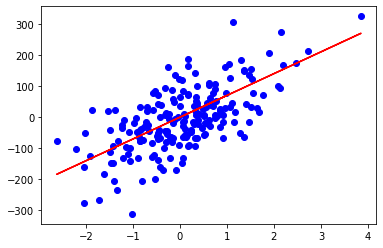

In [6]:
plt.scatter(x[:, 0], y, color='blue')
plt.plot(x[:, 0], single_class_pred, color='red')
plt.show()

In [12]:
# Create Gif
images = []
for e in range(EPOCH):
    img_name = 'regression/' + str(e + 1) + '.png'
    images.append(imageio.imread(img_name))
imageio.mimsave('regression/reg.gif', images, fps=5)